# 1.1 Разведочный анализ данных (EDA)
## **Задача**. По данным о пациенте из файла **heart_data.tsv** научиться предсказывать наличие у него сердечно-сосудистого заболевания: артериальной гипертензии, ОНМК, сердечной недостаточности и др.

Это задача **бинарной классификации**.
Необходимо построить разделяющую поверхность в пространстве признаков, разделяющую пространство на 2 части, каждая из которых соответствует определённому классу: есть заболевание или нет заболевания.

In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Загрузим необходимые библиотеки

In [268]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных

* Загрузим набор данных **heart_data.tsv**

**.tsv** означает, что разделителем в таблице является знак табуляции. Чтобы таблица загрузилась в классическом виде, необходимо в функции **read_csv()** библиотеки **pandas** указать аргумент **sep='\t'**

In [269]:
heart = pd.read_csv('/content/drive/MyDrive/ML_MED/heart_data.tsv', sep='\t')
heart.head() # выведем первые 5 строк таблицы

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,0,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
1,1,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,00:00:00,04:00:00,1,0,0,1,1,0,0,0
2,2,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,23:00:00,07:00:00,0,0,0,0,0,0,0,0
3,3,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,23:00:00,07:00:00,0,0,0,1,0,0,0,0
4,4,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,...,23:00:00,06:00:00,0,0,0,1,0,1,1,0


* Узнаем количество строк и столбцов в датафрейме

In [270]:
heart.shape

(955, 38)

955 строк и 38 столбцов

* Посмотрим информацию о признаках

In [271]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      955 non-null    int64  
 1   Пол                                     954 non-null    object 
 2   Семья                                   955 non-null    object 
 3   Этнос                                   955 non-null    object 
 4   Национальность                          955 non-null    object 
 5   Религия                                 955 non-null    object 
 6   Образование                             955 non-null    object 
 7   Профессия                               955 non-null    object 
 8   Работа                                  955 non-null    int64  
 9   Выход на пенсию                         955 non-null    int64  
 10  Прекращение работы по болезни           955 non-null    int64 

* Выведем названия всех признаков в наборе данных **heart**

In [272]:
heart.columns

Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Работа', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронхиальная астма',
       'Туберкулез легких', 'ВИЧ/СПИД',
       'Регулярный прием лекарственных средств', 'Травмы за год', 'Переломы',
       'Статус Курения', 'Возраст курения', 'Сигарет в день',
       'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког',
       'Время засыпания', 'Время пробуждения', 'Сон после обеда',
       'Спорт, клубы', 'Религия, клубы', 'Артериальная гипертензия', 'ОНМК',
       'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
       'Прочие заболевания сердца'],
      dtype='object')

* Посмотрим статистики числовых признаков с помощью метода  **.describe()**, округлив значения до 2-х знаков после запятой

In [273]:
heart.describe().round(2)

,ID,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,Туберкулез легких,...,Пассивное курение,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
count,955.00,955.00,955.00,955.00,955.00,955.00,955.00,955.00,955.00,955.00,...,955.00,788.00,955.00,955.00,955.00,955.00,955.00,955.00,955.0,955.00
mean,477.00,0.52,0.34,0.05,0.11,0.12,0.05,0.08,0.04,0.02,...,0.23,20.04,0.23,0.07,0.02,0.47,0.04,0.12,0.1,0.09
std,275.83,0.50,0.47,0.21,0.31,0.33,0.21,0.26,0.20,0.14,...,0.42,5.18,0.42,0.25,0.15,0.50,0.20,0.33,0.3,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,238.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
50%,477.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
75%,715.50,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,20.00,0.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00
max,954.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,63.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


* Для удобства изучения транспонируем таблицу

In [274]:
heart.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,955.0,477.00,275.83,0.0,238.5,477.0,715.5,954.0
Работа,955.0,0.52,0.50,0.0,0.0,1.0,1.0,1.0
Выход на пенсию,955.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
Прекращение работы по болезни,955.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0
Сахарный диабет,955.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0
Гепатит,955.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0
Онкология,955.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0
Хроническое заболевание легких,955.0,0.08,0.26,0.0,0.0,0.0,0.0,1.0
Бронхиальная астма,955.0,0.04,0.20,0.0,0.0,0.0,0.0,1.0
Туберкулез легких,955.0,0.02,0.14,0.0,0.0,0.0,0.0,1.0


* Посмотрим статистики категорийных признаков с помощью метода **.describe()**

In [275]:
heart.describe(include='object').T

,count,unique,top,freq
Пол,954,2,Ж,667
Семья,955,6,в браке в настоящее время,563
Этнос,955,3,европейская,931
Национальность,955,18,Русские,899
Религия,955,4,Христианство,804
Образование,955,4,4 - профессиональное училище,454
Профессия,955,11,дипломированные специалисты,225
Статус Курения,955,3,Никогда не курил(а),543
Частота пасс кур,223,5,1-2 раза в неделю,92
Алкоголь,955,3,употребляю в настоящее время,634


* Можно посмотреть статистики всех переменных используя значение **'all'** для аргумента **include**

In [276]:
heart.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,955.0,NaN,NaN,NaN,477.0,275.83,0.0,238.5,477.0,715.5,954.0
Пол,954,2,Ж,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Семья,955,6,в браке в настоящее время,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этнос,955,3,европейская,931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Национальность,955,18,Русские,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Религия,955,4,Христианство,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Образование,955,4,4 - профессиональное училище,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Профессия,955,11,дипломированные специалисты,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Работа,955.0,NaN,NaN,NaN,0.52,0.5,0.0,0.0,1.0,1.0,1.0
Выход на пенсию,955.0,NaN,NaN,NaN,0.34,0.47,0.0,0.0,0.0,1.0,1.0


* Узнаем количество уникальных значений в каждом столбце с помощью метода **nunique()**.

In [277]:
heart.nunique()

,0
ID,955
Пол,2
Семья,6
Этнос,3
Национальность,18
Религия,4
Образование,4
Профессия,11
Работа,2
Выход на пенсию,2


Большое количество столбцов содержит два различных значения

* Подсчитаем количество значений всех признаков датасета, включая пропущенные

In [278]:
for col in heart.columns:
    print(f'Признак:  {heart[col].value_counts(dropna=False)}')
    print()

Признак:  ID
0      1
641    1
629    1
630    1
631    1
      ..
322    1
323    1
324    1
325    1
954    1
Name: count, Length: 955, dtype: int64

Признак:  Пол
Ж      667
М      287
NaN      1
Name: count, dtype: int64

Признак:  Семья
в браке в настоящее время                          563
вдовец / вдова                                     143
в разводе                                          125
гражданский брак / проживание с партнером           79
никогда не был(а) в браке                           43
раздельное проживание (официально не разведены)      2
Name: count, dtype: int64

Признак:  Этнос
европейская                                                                                                      931
другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)     17
прочее (любая иная этно-расовая группа, не представленная выше)                                                    7
Name: count, dtype: int64

Признак

### Числовые признаки

Столбец **ID** содержит столько же разных значений, сколько элементов (строк) в таблице. Поскольку данная колонка не содержит важной информации о модели, мы можем ее исключить
* Отбросим неинформативный признак **ID**

In [279]:
heart = heart.drop("ID", axis=1) # можно также использовать heart.drop("ID", axis=1, inplace=True)
heart.head(3)

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
1,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,00:00:00,04:00:00,1,0,0,1,1,0,0,0
2,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,23:00:00,07:00:00,0,0,0,0,0,0,0,0


* Изучим признак **ВИЧ/СПИД**

In [280]:
heart['ВИЧ/СПИД'].value_counts(dropna=False)

,count
ВИЧ/СПИД,
0,953
1,2


Этот код выполняет подсчет количества уникальных значений в столбце **ВИЧ/СПИД** датафрейма **heart**. Однако, в отличие от обычного вызова **value_counts**, здесь используется параметр **dropna=False**, который указывает, что даже если в столбце есть пропущенные значения (**NaN**), они также будут учтены в подсчете.

Всего 2 пациента больны ВИЧ/СПИД, т.е. признак является редким. Его также можно отбросить

* Удалим признак **ВИЧ/СПИД**

In [281]:
heart.drop(['ВИЧ/СПИД'], axis=1, inplace=True)

**inplace=True** указывает, что метод **drop** должен удалить столбец **ВИЧ/СПИД** из объекта данных **heart** непосредственно, не создавая новую копию данных

* Отметим, что у людей, которые никогда не курили, отсутствуют значения в столбцах **Возраст курения** и **Сигарет в день**.

In [282]:
# Находим строки, где 'Возраст курения' отсутствует
missing_smoking_age = heart['Возраст курения'].isna()

# Находим строки, где 'Сигарет в день' также отсутствует
missing_cigarettes_per_day = heart['Сигарет в день'].isna()

# Проверяем, есть ли строки, где 'Возраст курения' отсутствует и 'Сигарет в день' также отсутствует
if (missing_smoking_age & missing_cigarettes_per_day).any():
    print('Да, это правда!')

Да, это правда!


Мы можем заполнить эти пропуски, используя максимальное значение возраста (например, 90, что будет означать, что пациент начал курить только в 90 лет...точнее никогда не начнёт) для **Возраст курения** и ноль для **Сигарет в день**.

In [283]:
heart['Возраст курения'].fillna(90, inplace=True)
heart['Сигарет в день'].fillna(0, inplace=True)

Аналогично для переменной **Возраст алког**.

In [284]:
heart['Возраст алког'].fillna(90, inplace=True)

### Удаление пропущенных значений

* Вычислим сумму  пропущенных значений в каждом столбце.

    *   Метод **isna()** возвращает таблицу, состоящую из **True/False** для каждого
элемента, в зависимости от того находится ли там пропущенное значение (**NaN**).

    *   Метод **sum()** суммирует элементы в столбцах таблицы принимая **True** за **1**, а **False** за **0**.

In [285]:
heart.isna().sum()

,0
Пол,1
Семья,0
Этнос,0
Национальность,0
Религия,0
Образование,0
Профессия,0
Работа,0
Выход на пенсию,0
Прекращение работы по болезни,0


У одного человека неизвестен пол. Проанализируем данные этого человека.

* Выберем только строчку с данными о пациенте, у которого не указан пол

In [286]:
heart[heart['Пол'].isna()]

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
304,NaN,гражданский брак / проживание с партнером,европейская,Русские,Нет,3 - средняя школа / закон.среднее / выше среднего,"работники, занятые в сфере обслуживания, торг...",1,0,0,...,01:00:00,06:30:00,0,0,0,0,0,0,0,0


Человек, кажется, совершенно здоров, несмотря на то, что курит три сигареты в день (что является необычным количеством для курильщика). Также отсутствуют признаки пассивного курения, что указывает на то, что в его окружении курит только один человек - он сам. Возраст начала употребления алкоголя указан  20 лет (больше, чем возраст начала курения - 18 лет). Исходя из времени засыпания и пробуждения, можно предположить, что он спит около пяти с половиной часов, что значительно меньше рекомендуемого количества сна для человека. В данном случае мы можем закодировать его пол как 0.5, хотя из-за странных данных  пациента,  его лучше удалить из датасета.

In [287]:
# Можно закодировать пол как 0.5:
# heart['Пол'] = heart['Пол'].map({'Ж': 0, 'М': 1})
# heart['Пол'].fillna(0.5, inplace=True)

* Удалим из датасета строчку, в которой не указан пол пациента

In [288]:
heart.dropna(subset=['Пол'], axis=0, inplace=True)

У пациентов с нулевым значением в переменной **Пассивное курение** должны быть пропущены значения в столбцах **Частота пасс кур**.

In [289]:
# Проверяем условие, что если 'Пассивное курение' равно 0, то 'Частота пасс кур' должна быть NaN
condition = (heart['Пассивное курение'] == 0) & (heart['Частота пасс кур'].notna())

# Если условие выполняется для хотя бы одной строки, выводим соответствующее сообщение и индексы строк
if condition.any():
    print('Есть строки, где "Пассивное курение" равно 0, но "Частота пасс кур" не является NaN.')
    print('Индексы этих строк:')
    print(heart.index[condition].tolist())
else:
    print('Все строки корректны: если "Пассивное курение" равно 0, то "Частота пасс кур" равна NaN.')

Есть строки, где "Пассивное курение" равно 0, но "Частота пасс кур" не является NaN.
Индексы этих строк:
[392]


Одна ошибка. У пациента с индексом 392 условие не выполняется. Изучим данного пациента.

In [290]:
print(heart.loc[392])

Пол                                                                  Ж
Семья                                        в браке в настоящее время
Этнос                                                      европейская
Национальность                                                 Русские
Религия                                                   Христианство
Образование                                                    5 - ВУЗ
Профессия                                                     служащие
Работа                                                               0
Выход на пенсию                                                      0
Прекращение работы по болезни                                        0
Сахарный диабет                                                      0
Гепатит                                                              0
Онкология                                                            0
Хроническое заболевание легких                                       0
Бронхи

Женщина курит с 19 лет и указала, что частота пассивного курения 3-6 раз в неделю. Значит ошибка в переменной ‘Пассивное курение’.
Заменим значение признака ‘Пассивное курение’ для пациента с индексом 392 на 1.

In [291]:
heart.loc[392, 'Пассивное курение'] = 1

Теперь всё правильно и мы можем заполнить эти пропуски нулями.

* Заполним пропуски в признаке **Частота пасс кур** нулями. Но так как признак является категорийным, поставим 0 как строку, заключив в кавычки. Иначе далее при кодировании признака эти нули снова будут рассматриваться как пропущенные значений.

In [292]:
heart['Частота пасс кур'].fillna('0', inplace=True)

* Проверим остались ли у нас пропущенные значения в данных

In [293]:
heart.isna().sum()

,0
Пол,0
Семья,0
Этнос,0
Национальность,0
Религия,0
Образование,0
Профессия,0
Работа,0
Выход на пенсию,0
Прекращение работы по болезни,0


Пропущенных значений нет

## Категориальные признаки

Категориальные переменные требуют соответствующей **кодировки** для обработки в моделях машинного обучения.

* Закодируем признак **Пол**

In [294]:
heart['Пол'] = heart['Пол'].map({'М': 0, 'Ж': 1})

* Исследуем признаки **Образование** и **Частота пасс кур**

In [295]:
for col in ['Образование', 'Частота пасс кур']:
    print(heart[col].value_counts(dropna=False))
    print()

Образование
4 - профессиональное училище                         454
5 - ВУЗ                                              313
3 - средняя школа / закон.среднее / выше среднего    180
2 - начальная школа                                    7
Name: count, dtype: int64

Частота пасс кур
0                         731
1-2 раза в неделю          92
4 и более раз в день       47
2-3 раза в день            30
не менее 1 раза в день     29
3-6 раз в неделю           25
Name: count, dtype: int64



Признаки **Образование** и **Частота пасс кур** являются ординальными.

**Ординарные признаки** (также известные как порядковые или ранговые) - это характеристики, которые можно упорядочить по степени или уровню. Они представляют собой шкалу, на которой объекты могут быть расположены в определенном порядке, например, от низкого к высокому или от слабого к сильному. Мы можем использовать этот порядок для кодирования.

* Заменим все уникальные значения переменной **Частота пасс кур** на числа

In [296]:
heart['Частота пасс кур'] = heart['Частота пасс кур'].map(
    {'0': 0,
     '1-2 раза в неделю': 1,
     '3-6 раз в неделю': 2,
     'не менее 1 раза в день': 3,
     '2-3 раза в день': 4,
     '4 и более раз в день': 5})

* Изменим тип переменной **Частота пасс кур** на целочисленный

In [297]:
heart['Частота пасс кур'] = heart['Частота пасс кур'].astype(int)

* Закодируем признак **Образование**

In [298]:
heart['Образование'] = heart['Образование'].str[:1].astype(int)

Так как образование указано в виде номер-название (например, 3 - средняя школа / закон.среднее / выше среднего), мы можем оставить только номер.

**.str[:1]** получает первый символ каждой строки, а **.astype(int)** преобразует полученные символы в целые числа (изначально они были строками).

* Посмотрим результат

In [299]:
for col in ['Образование', 'Частота пасс кур']:
    print(heart[col].value_counts(dropna=False))
    print()

Образование
4    454
5    313
3    180
2      7
Name: count, dtype: int64

Частота пасс кур
0    731
1     92
5     47
4     30
3     29
2     25
Name: count, dtype: int64



Рассмотрим переменные **Время пробуждения** и **Время засыпания**

* Закодируем время пробуждения, как час от полуночи, а время засыпания, как час от полудня

In [300]:
heart['Время пробуждения'].head()

,Время пробуждения
0,06:00:00
1,04:00:00
2,07:00:00
3,07:00:00
4,06:00:00


In [301]:
heart['Время пробуждения'] = heart['Время пробуждения'].str[:2].astype(int)
heart['Время засыпания'] = (heart['Время засыпания'].str[:2].astype(int) + 12) % 24

В первой строке кода происходит преобразование первых двух символов каждого значения в столбце **Время пробуждения** в целые числа.

Вторая строка кода преобразует первые два символа каждого значения в столбце **Время засыпания** в целые числа, добавляет 12 к каждому значению, а затем берет остаток от деления на 24, т.е. преобразует значения в часы после полуночи.

In [302]:
heart['Время пробуждения'].head()

,Время пробуждения
0,6
1,4
2,7
3,7
4,6


* Добавим в датасет новый признак - **Продолжительность сна**

In [303]:
heart['Продолжительность сна'] = heart['Время пробуждения'] - heart['Время засыпания'] + 12

* Посмотрим что у нас получилось

In [304]:
heart.head(5)

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
0,0,в браке в настоящее время,европейская,Русские,Христианство,3,низкоквалифицированные работники,1,0,0,...,6,0,0,0,0,0,0,0,0,8
1,1,в разводе,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,4,1,0,0,1,1,0,0,0,4
2,1,в браке в настоящее время,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,7,0,0,0,0,0,0,0,0,8
3,0,в браке в настоящее время,европейская,Русские,Атеист / агностик,3,низкоквалифицированные работники,1,0,0,...,7,0,0,0,1,0,0,0,0,8
4,1,в браке в настоящее время,европейская,Русские,Христианство,3,операторы и монтажники установок и машинного о...,0,0,1,...,6,0,0,0,1,0,1,1,0,7


In [305]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 954
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Пол                                     954 non-null    int64  
 1   Семья                                   954 non-null    object 
 2   Этнос                                   954 non-null    object 
 3   Национальность                          954 non-null    object 
 4   Религия                                 954 non-null    object 
 5   Образование                             954 non-null    int64  
 6   Профессия                               954 non-null    object 
 7   Работа                                  954 non-null    int64  
 8   Выход на пенсию                         954 non-null    int64  
 9   Прекращение работы по болезни           954 non-null    int64  
 10  Сахарный диабет                         954 non-null    int64  
 11

Больше нет пропущенных значений. Осталось 7 категориальных признаков. Но прежде чем их кодировать, посмотрим корреляционные зависимости между всеми числовыми признаками.

In [306]:
heart.corr(numeric_only=True).round(2)

,Пол,Образование,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
Пол,1.00,0.10,-0.18,0.16,-0.01,0.05,0.00,0.05,-0.00,0.06,...,0.04,-0.07,0.01,0.02,0.12,-0.08,-0.01,0.08,0.09,0.02
Образование,0.10,1.00,0.14,-0.12,-0.09,-0.10,-0.01,-0.01,-0.07,-0.11,...,0.05,-0.11,0.16,-0.02,-0.11,-0.06,-0.05,-0.08,0.02,-0.01
Работа,-0.18,0.14,1.00,-0.74,-0.24,-0.14,0.02,-0.13,0.00,-0.06,...,-0.16,-0.15,0.02,-0.02,-0.22,-0.08,-0.21,-0.18,-0.06,-0.11
Выход на пенсию,0.16,-0.12,-0.74,1.00,-0.07,0.17,-0.05,0.11,-0.00,0.06,...,0.10,0.11,0.02,0.01,0.26,0.06,0.22,0.18,0.03,0.09
Прекращение работы по болезни,-0.01,-0.09,-0.24,-0.07,1.00,0.02,0.02,0.07,0.01,0.00,...,0.04,0.07,-0.04,0.06,0.04,0.10,0.08,0.05,0.03,0.03
Сахарный диабет,0.05,-0.10,-0.14,0.17,0.02,1.00,-0.01,0.07,-0.05,0.04,...,0.01,0.17,0.03,-0.01,0.23,0.04,0.14,0.10,0.03,0.01
Гепатит,0.00,-0.01,0.02,-0.05,0.02,-0.01,1.00,0.04,0.03,0.02,...,0.02,-0.02,0.01,-0.01,-0.03,-0.01,-0.02,0.00,-0.00,0.02
Онкология,0.05,-0.01,-0.13,0.11,0.07,0.07,0.04,1.00,-0.00,0.00,...,0.05,0.00,-0.02,0.07,0.09,0.00,0.04,0.04,0.06,0.04
Хроническое заболевание легких,-0.00,-0.07,0.00,-0.00,0.01,-0.05,0.03,-0.00,1.00,0.23,...,-0.10,0.03,0.03,0.06,0.07,-0.00,0.00,0.05,0.06,-0.11
Бронхиальная астма,0.06,-0.11,-0.06,0.06,0.00,0.04,0.02,0.00,0.23,1.00,...,-0.02,-0.02,0.02,-0.03,0.09,-0.04,0.05,0.10,0.02,-0.04


(30.5, -0.5)

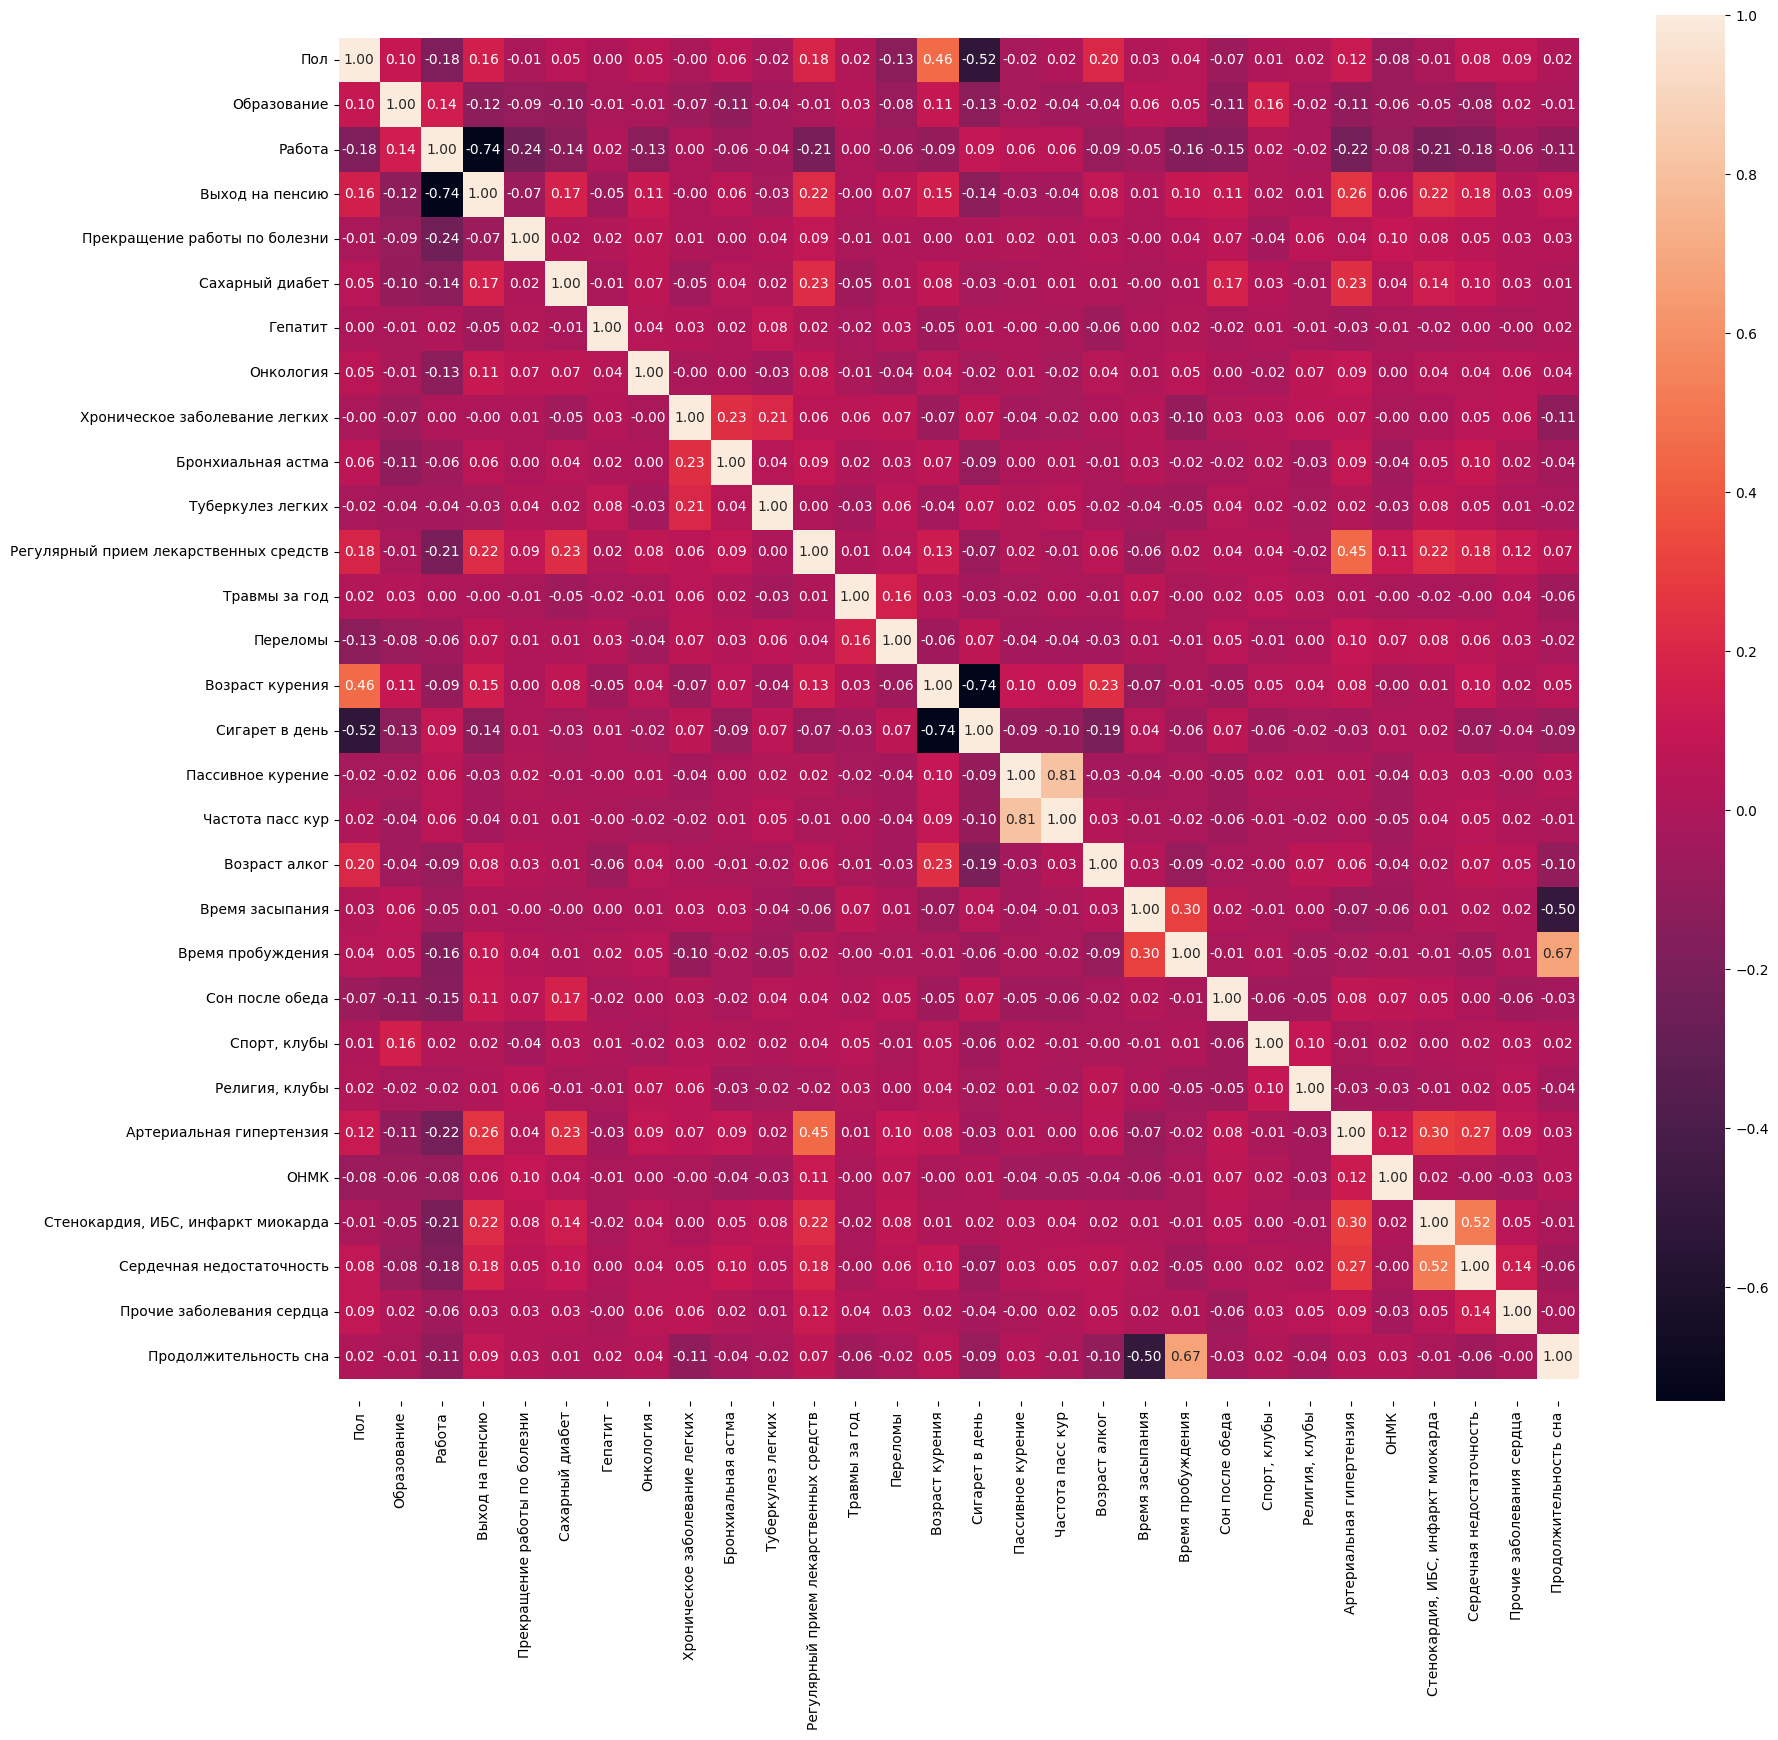

In [307]:
plt.figure(figsize = (20,18))
# heart.corr(numeric_only=True): вычисляет корреляционную матрицу для числовых столбцов DataFrame heart
# annot=True: отображает числовые значения корреляций на тепловой карте
# fmt=".2f": определяет формат числовых значений, отображаемых на тепловой карте (2 знака после запятой)
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")
# Получаем текущие границы оси Y
i, k = ax.get_ylim()
# Сужаем диапазон оси Y
ax.set_ylim(i+0.5, k-0.5)

In [308]:
corr = heart.corr(numeric_only=True).round(4)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Пассивное курение,Частота пасс кур
Пассивное курение,1.0000,0.8134
Частота пасс кур,0.8134,1.0000


Признаки **Пассивное курение** и **Частота пасс кур** сильно коррелируют. Удалим один из них.

In [309]:
heart = heart.drop("Пассивное курение", axis=1)

* Сохраним результат анализа на данный момент в новый датасет

### Без кодировки 7 категорийных признаков

In [310]:
heart.to_csv('/content/drive/MyDrive/ML_MED/heart_1.csv', index=False)

Осталось 7 категориальных признаков: **Семья**, **Этнос**, **Национальность**, **Религия**, **Профессия**, **Статус Курения** и **Алкоголь**.

Для их кодирования можно использовать:

1) класс **OneHotEncoder** из библиотеки **sklearn.preprocessing**

2) **кодирование по популярности**  с  добавлением в закодированные значения небольшого уровня шума, чтобы различать категории с одинаковой популярностью


* Рассмотрим подробнее какие уникальные значения имеют 7 категориальных переменных, которые нам необходимо закодировать числовыми значениями

In [311]:
for col in ['Семья', 'Этнос', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']:
    print(heart[col].value_counts(dropna=False))
    print()

Семья
в браке в настоящее время                          563
вдовец / вдова                                     143
в разводе                                          125
гражданский брак / проживание с партнером           78
никогда не был(а) в браке                           43
раздельное проживание (официально не разведены)      2
Name: count, dtype: int64

Этнос
европейская                                                                                                      930
другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)     17
прочее (любая иная этно-расовая группа, не представленная выше)                                                    7
Name: count, dtype: int64

Национальность
Русские                  898
Татары                    18
Немцы                      6
Чуваши                     5
Украинцы                   4
Азербайджанцы              4
Казахи                     2
Евреи                      2
Таджик

* Посчитаем сколько уникальных значений имеет категориальные признаки

In [312]:
columns_to_change = ['Семья', 'Этнос', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), heart[column].nunique())

Число уникальных значений признака Семья:  6
Число уникальных значений признака Этнос:  3
Число уникальных значений признака Национальность:  18
Число уникальных значений признака Религия:  4
Число уникальных значений признака Профессия:  11
Число уникальных значений признака Статус Курения:  3
Число уникальных значений признака Алкоголь:  3


### 1. Кодирование категориальных переменных **OneHot-методом**




In [313]:
# Инициализация кодировщика
one_hot_encoder = OneHotEncoder()

In [314]:
# Обучаем энкодер, применяем преобразование к выборке. Результат переводим в массив
heart_onehot = one_hot_encoder.fit_transform(heart[columns_to_change]).toarray()

In [315]:
# Сохраним полученные названия новых колонок в переменную colums
columns = one_hot_encoder.get_feature_names_out(columns_to_change)

In [316]:
# Преобразуем массив в формат DataFrame
heart_onehot_df = pd.DataFrame(heart_onehot, columns=columns)

In [317]:
# Переустановим индексацию в таблицах
# eset_index() — изменяет индексы с рандомных на последовательные от 0 до n
# drop(['index'], axis = 1) — удаляет образовавшийся столбец 'index'
heart = heart.reset_index().drop(['index'], axis = 1)

In [318]:
# Объединим таблицы
heart = pd.concat([heart, heart_onehot_df], axis=1)

In [319]:
# Удалим старые категориальные признаки
heart = heart.drop(columns=columns_to_change)

In [320]:
# Сделаем все признаки целочисленными
heart = heart.astype(int)

In [321]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 77 columns):
 #   Column                                                                                                               Non-Null Count  Dtype
---  ------                                                                                                               --------------  -----
 0   Пол                                                                                                                  954 non-null    int64
 1   Образование                                                                                                          954 non-null    int64
 2   Работа                                                                                                               954 non-null    int64
 3   Выход на пенсию                                                                                                      954 non-null    int64
 4   Прекращение работы по боле

In [322]:
heart.columns

Index(['Пол', 'Образование', 'Работа', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронхиальная астма',
       'Туберкулез легких', 'Регулярный прием лекарственных средств',
       'Травмы за год', 'Переломы', 'Возраст курения', 'Сигарет в день',
       'Частота пасс кур', 'Возраст алког', 'Время засыпания',
       'Время пробуждения', 'Сон после обеда', 'Спорт, клубы',
       'Религия, клубы', 'Артериальная гипертензия', 'ОНМК',
       'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
       'Прочие заболевания сердца', 'Продолжительность сна',
       'Семья_в браке в настоящее время', 'Семья_в разводе',
       'Семья_вдовец / вдова',
       'Семья_гражданский брак / проживание с партнером',
       'Семья_никогда не был(а) в браке',
       'Семья_раздельное проживание (официально не разведены)',
       'Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахста

Такого же результата можно было добиться с помощью следующего кода:

In [323]:
# heart = pd.read_csv('/content/drive/MyDrive/ML_MED/heart_1.csv')

In [324]:
#def encode_data(heart, columns_to_change):
#  dummies = pd.get_dummies(heart[[columns_to_change]], dtype='int')
#  res = pd.concat([heart, dummies], axis=1)
#  res = res.drop([columns_to_change], axis=1)
#  return (res)
#for feature in columns_to_change:
# heart = encode_data(heart, feature)

* Построим матрицу корреляций

In [325]:
heart.corr(numeric_only=True)

,Пол,Образование,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,...,"Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты,Статус Курения_Бросил(а),Статус Курения_Курит,Статус Курения_Никогда не курил(а),Алкоголь_никогда не употреблял,Алкоголь_ранее употреблял,Алкоголь_употребляю в настоящее время
Пол,1.000000,0.102920,-0.182499,0.161048,-0.012391,0.047430,0.004187,0.054379,-0.002939,0.060118,...,0.066402,-0.206093,0.070964,0.140735,-0.254398,-0.259450,0.426271,0.179109,-0.086946,-0.075311
Образование,0.102920,1.000000,0.143357,-0.121664,-0.085568,-0.096346,-0.014784,-0.009459,-0.065272,-0.114344,...,-0.104359,-0.129151,-0.025731,-0.031043,-0.028141,-0.086922,0.096678,-0.028848,-0.056261,0.067128
Работа,-0.182499,0.143357,1.000000,-0.744003,-0.235711,-0.135257,0.018357,-0.126362,0.002698,-0.056351,...,0.026309,-0.097793,0.020998,-0.021540,-0.036212,0.134157,-0.084855,-0.073829,-0.111206,0.146139
Выход на пенсию,0.161048,-0.121664,-0.744003,1.000000,-0.066635,0.174060,-0.051647,0.113182,-0.001269,0.057444,...,-0.079260,0.100356,-0.001433,0.025356,-0.017017,-0.146497,0.138365,0.068411,0.022049,-0.072017
Прекращение работы по болезни,-0.012391,-0.085568,-0.235711,-0.066635,1.000000,0.017971,0.021864,0.069024,0.009786,0.000556,...,0.016372,0.028745,-0.022425,0.055477,-0.002563,-0.007062,0.008079,0.026444,0.098934,-0.098605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Статус Курения_Курит,-0.259450,-0.086922,0.134157,-0.146497,-0.007062,-0.058975,0.018955,-0.082958,0.088520,-0.066935,...,0.028806,0.029741,-0.048993,-0.075853,-0.273916,1.000000,-0.629278,-0.131926,-0.020017,0.121265
Статус Курения_Никогда не курил(а),0.426271,0.096678,-0.084855,0.138365,0.008079,0.072327,-0.054975,0.046171,-0.063958,0.069551,...,-0.034483,-0.077566,0.027328,0.095199,-0.575087,-0.629278,1.000000,0.207560,-0.090389,-0.095389
Алкоголь_никогда не употреблял,0.179109,-0.028848,-0.073829,0.068411,0.026444,-0.004221,-0.058648,0.047597,0.005741,-0.014912,...,0.024062,-0.032334,-0.062258,0.091628,-0.117983,-0.131926,0.207560,1.000000,-0.202192,-0.642174
Алкоголь_ранее употреблял,-0.086946,-0.056261,-0.111206,0.022049,0.098934,0.068944,0.010402,0.040554,0.045348,-0.023819,...,-0.050494,0.062822,0.060922,0.029840,0.132925,-0.020017,-0.090389,-0.202192,1.000000,-0.620884


* Нарисуем тепловую карту матрицы корреляций

In [328]:
plt.figure(figsize = (45,38))
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Output hidden; open in https://colab.research.google.com to view.

* Найдём все признаки, корреляция которых выше 0,8

In [239]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Возраст курения,Возраст алког,"Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)",Этнос_европейская,Статус Курения_Никогда не курил(а),Алкоголь_никогда не употреблял
Возраст курения,1.000000,0.231633,-0.082738,0.052033,0.988513,0.210620
Возраст алког,0.231633,1.000000,-0.019617,0.030951,0.222443,0.977559
"Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)",-0.082738,-0.019617,1.000000,-0.838476,-0.074820,-0.019698
Этнос_европейская,0.052033,0.030951,-0.838476,1.000000,0.049477,0.038067
Статус Курения_Никогда не курил(а),0.988513,0.222443,-0.074820,0.049477,1.000000,0.207560
Алкоголь_никогда не употреблял,0.210620,0.977559,-0.019698,0.038067,0.207560,1.000000


Переменные

**Возраст курения** и **Статус Курения_Никогда не курил(а)**

**Возраст алког** и **Алкоголь_никогда не употреблял**

**Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)** и **Этнос_европейская**

сильно коррелируют.

Удалим одну из коррелирующих переменных в каждой паре.

In [240]:
heart.drop(columns=['Статус Курения_Никогда не курил(а)','Алкоголь_никогда не употреблял', 'Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)'], axis=1, inplace=True)

* Сохраним результат в новый набор данных

In [241]:
heart.to_csv('/content/drive/MyDrive/ML_MED/heart_2.csv', index=False)


### 2. Кодирования категориальных признаков - **по популярности**

* Вернёмся к набору данных до кодирования  7 признаков

In [242]:
heart = pd.read_csv('/content/drive/MyDrive/ML_MED/heart_1.csv')
heart.head (3)

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
0,0,в браке в настоящее время,европейская,Русские,Христианство,3,низкоквалифицированные работники,1,0,0,...,6,0,0,0,0,0,0,0,0,8
1,1,в разводе,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,4,1,0,0,1,1,0,0,0,4
2,1,в браке в настоящее время,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,7,0,0,0,0,0,0,0,0,8


* Закодируем признаки по популярности с добавлением в закодированные значения небольшого уровня шума, чтобы различать категории с одинаковой популярностью

In [243]:
np.random.seed(42)
cats = ['Семья', 'Этнос', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']
for cat in cats:
    heart[cat] = heart[cat].map(heart[cat].value_counts()) + 0.1 * np.random.random(len(heart))

**np.random.seed(42)** - устанавливает начальное значение для генератора случайных чисел в библиотеке NumPy. Это гарантирует, что каждый раз, когда код выполняется, он будет генерировать одни и те же случайные числа, что полезно для воспроизводимости результатов.

**cats = ['Семья', 'Этнос', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']** - создает список категорий, которые будут закодированы.

**for cat in cats:** - начинает цикл, который будет проходить по каждой категории в списке **cats**.

 **heart[cat].map(heart[cat].value_counts())** - применяет функцию **value_counts()** к столбцу **heart[cat]** и использует результат для создания нового столбца.

 **+ 0.1 * np.random.random(len(heart)))** - добавляет к каждому значению в новом столбце случайное число, умноженное на 0.1. Это добавляет шум к кодированию, чтобы различать категории с одинаковой популярностью.

* Посмотрим результат данной кодировки

In [244]:
heart[cats].head()

,Семья,Этнос,Национальность,Религия,Профессия,Статус Курения,Алкоголь
0,563.037454,930.041877,898.032693,804.095046,138.035921,220.000698,633.013032
1,125.095071,930.038314,898.014889,804.058162,225.082355,543.040348,165.064343
2,563.073199,930.051892,898.030560,804.043661,225.082070,543.023475,633.019718
3,563.059866,930.004697,898.087665,86.058009,138.047735,191.081887,633.009761
4,563.015602,930.016628,898.099633,804.051670,72.035082,543.033733,633.016685


In [245]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Пол                                     954 non-null    int64  
 1   Семья                                   954 non-null    float64
 2   Этнос                                   954 non-null    float64
 3   Национальность                          954 non-null    float64
 4   Религия                                 954 non-null    float64
 5   Образование                             954 non-null    int64  
 6   Профессия                               954 non-null    float64
 7   Работа                                  954 non-null    int64  
 8   Выход на пенсию                         954 non-null    int64  
 9   Прекращение работы по болезни           954 non-null    int64  
 10  Сахарный диабет                         954 non-null    int64 

In [246]:
heart.corr(numeric_only=True).round(2)

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
Пол,1.00,-0.27,0.10,0.11,0.17,0.10,0.17,-0.18,0.16,-0.01,...,0.04,-0.07,0.01,0.02,0.12,-0.08,-0.01,0.08,0.09,0.02
Семья,-0.27,1.00,-0.03,-0.01,-0.04,0.02,-0.03,0.04,-0.06,-0.04,...,-0.01,0.04,-0.03,-0.01,-0.07,0.02,-0.02,-0.04,-0.02,0.02
Этнос,0.10,-0.03,1.00,0.64,0.29,0.09,0.03,-0.05,0.07,-0.03,...,-0.02,0.02,-0.01,-0.06,0.00,0.03,-0.00,0.01,0.05,-0.06
Национальность,0.11,-0.01,0.64,1.00,0.29,0.07,0.05,-0.01,0.07,-0.03,...,-0.01,0.02,-0.00,-0.02,-0.02,0.01,-0.06,-0.04,0.02,-0.03
Религия,0.17,-0.04,0.29,0.29,1.00,0.04,0.05,-0.03,0.05,-0.05,...,0.06,0.01,-0.01,0.03,0.05,0.05,0.00,0.02,0.06,0.01
Образование,0.10,0.02,0.09,0.07,0.04,1.00,0.40,0.14,-0.12,-0.09,...,0.05,-0.11,0.16,-0.02,-0.11,-0.06,-0.05,-0.08,0.02,-0.01
Профессия,0.17,-0.03,0.03,0.05,0.05,0.40,1.00,0.09,-0.06,-0.03,...,-0.02,-0.05,0.09,0.01,-0.06,-0.03,-0.01,-0.05,0.05,-0.06
Работа,-0.18,0.04,-0.05,-0.01,-0.03,0.14,0.09,1.00,-0.74,-0.24,...,-0.16,-0.15,0.02,-0.02,-0.22,-0.08,-0.21,-0.18,-0.06,-0.11
Выход на пенсию,0.16,-0.06,0.07,0.07,0.05,-0.12,-0.06,-0.74,1.00,-0.07,...,0.10,0.11,0.02,0.01,0.26,0.06,0.22,0.18,0.03,0.09
Прекращение работы по болезни,-0.01,-0.04,-0.03,-0.03,-0.05,-0.09,-0.03,-0.24,-0.07,1.00,...,0.04,0.07,-0.04,0.06,0.04,0.10,0.08,0.05,0.03,0.03


(36.5, -0.5)

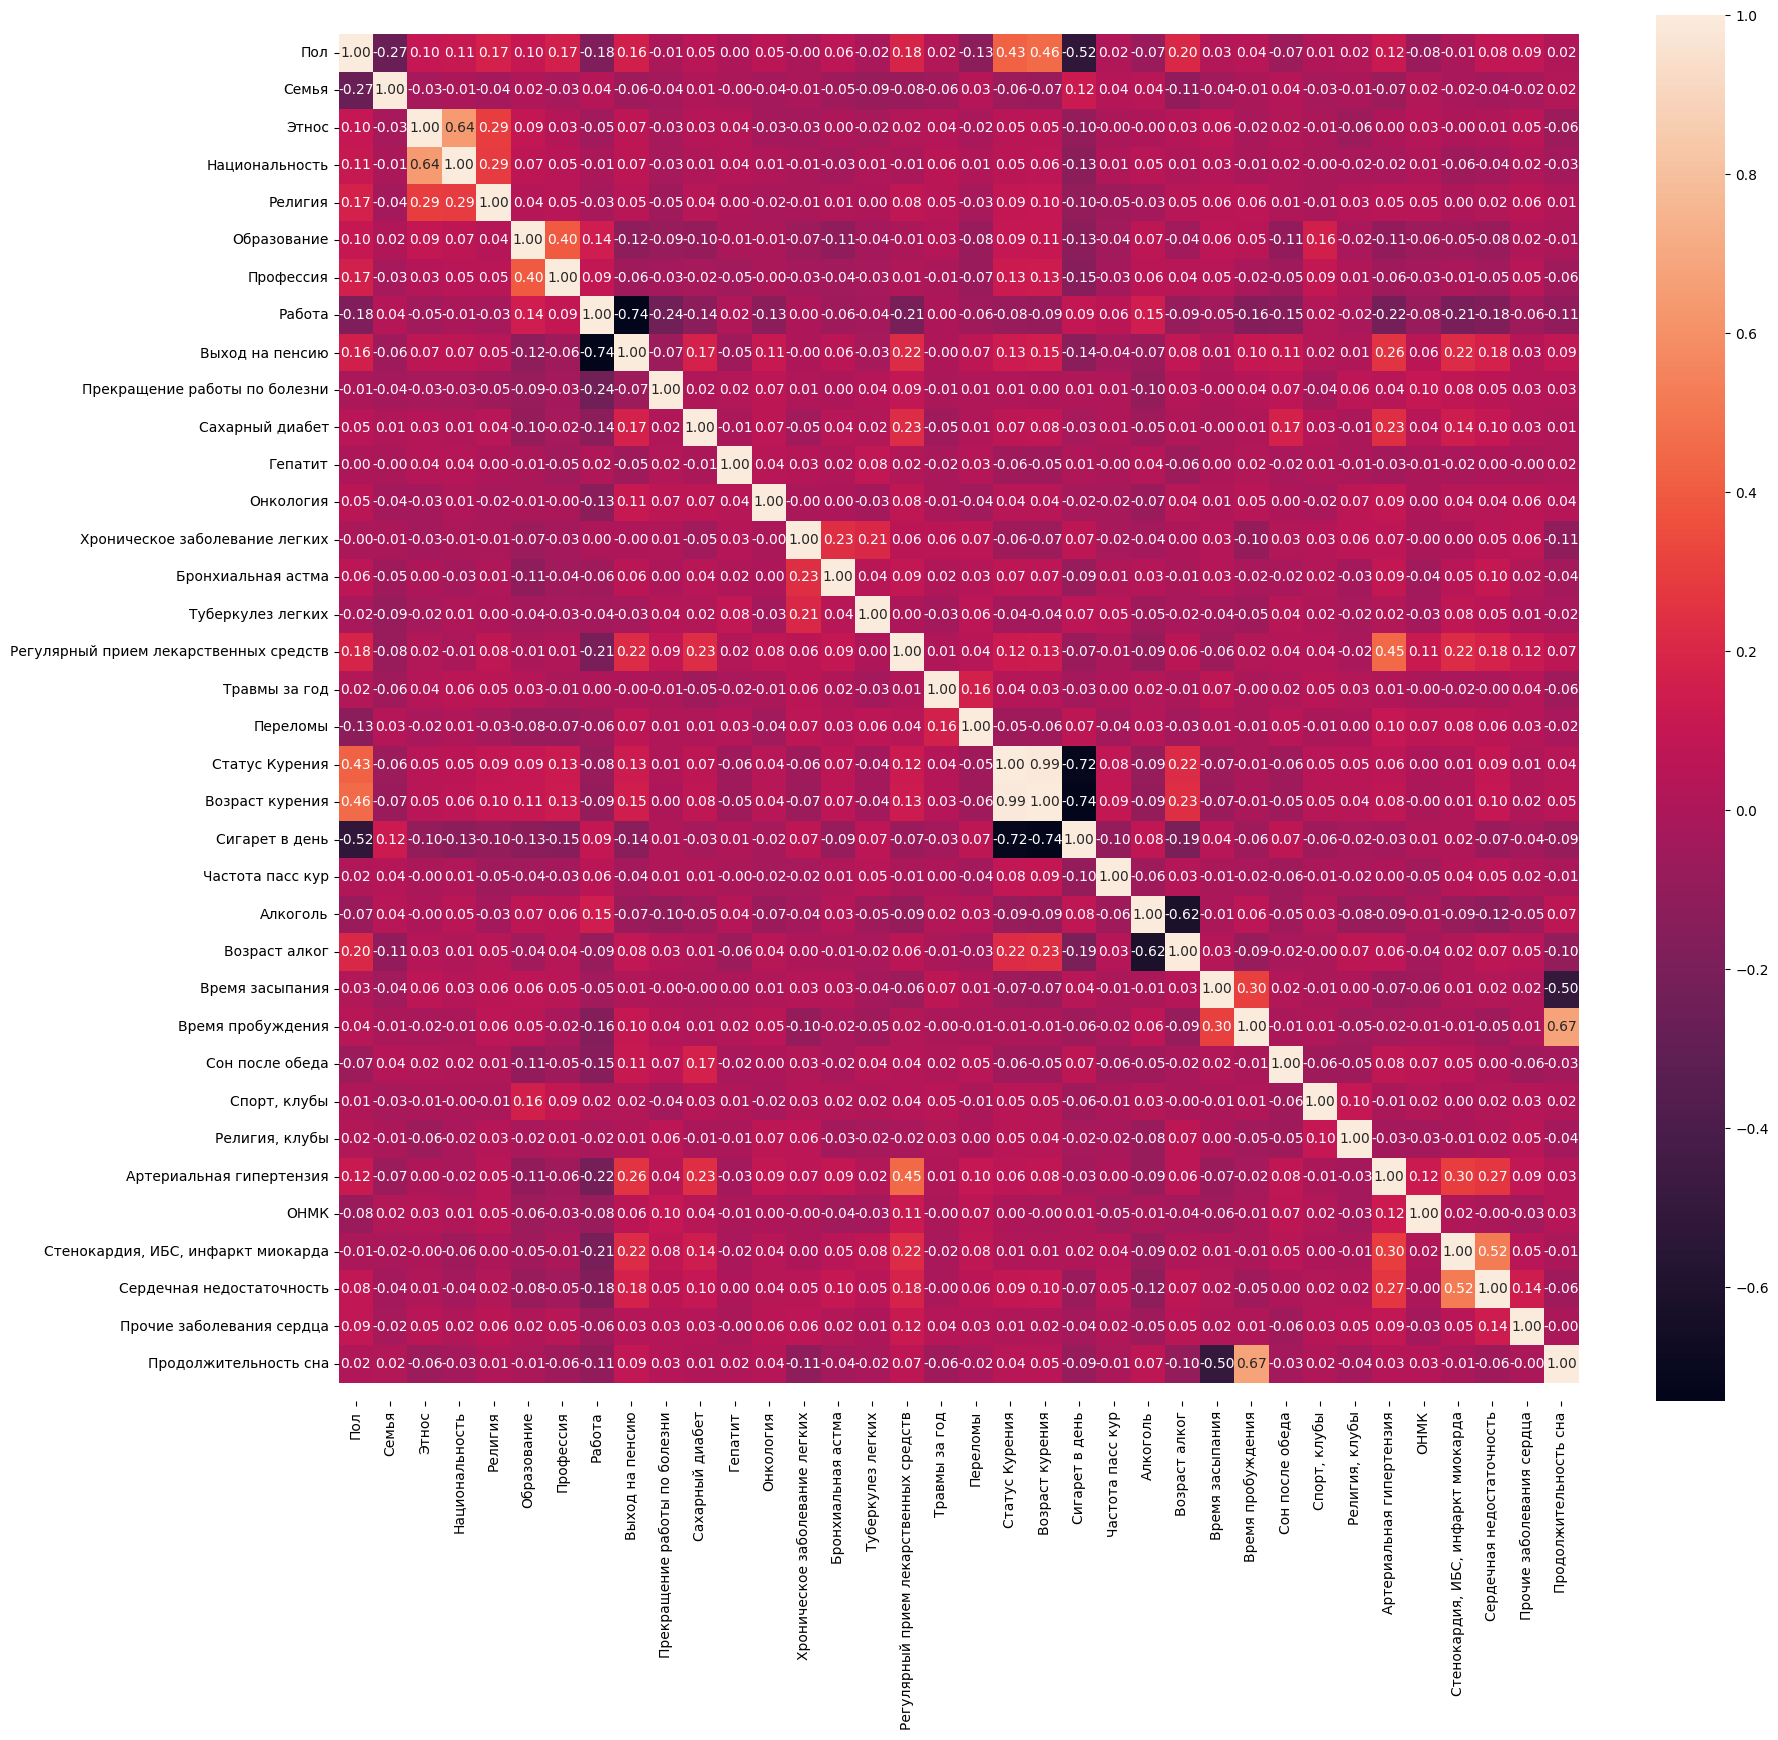

In [248]:
plt.figure(figsize = (20,18))
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [249]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Статус Курения,Возраст курения
Статус Курения,1.000000,0.987645
Возраст курения,0.987645,1.000000


* Удалим одну из сильно коррелирующих переменных

In [250]:
heart.drop(['Статус Курения'], axis=1, inplace=True)

* Сохраним результат в новый набор данных

In [251]:
heart.to_csv('/content/drive/MyDrive/ML_MED/heart_3.csv', index=False)

### 3. OnHot метод + бинарное кодирование

In [252]:
heart=pd.read_csv('/content/drive/MyDrive/ML_MED/heart_1.csv')
heart.head()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Продолжительность сна
0,0,в браке в настоящее время,европейская,Русские,Христианство,3,низкоквалифицированные работники,1,0,0,...,6,0,0,0,0,0,0,0,0,8
1,1,в разводе,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,4,1,0,0,1,1,0,0,0,4
2,1,в браке в настоящее время,европейская,Русские,Христианство,5,дипломированные специалисты,0,0,0,...,7,0,0,0,0,0,0,0,0,8
3,0,в браке в настоящее время,европейская,Русские,Атеист / агностик,3,низкоквалифицированные работники,1,0,0,...,7,0,0,0,1,0,0,0,0,8
4,1,в браке в настоящее время,европейская,Русские,Христианство,3,операторы и монтажники установок и машинного о...,0,0,1,...,6,0,0,0,1,0,1,1,0,7


In [253]:
columns_to_change1 = ['Семья', 'Этнос', 'Религия', 'Статус Курения', 'Алкоголь']
for column in columns_to_change1:
 print('Число уникальных значений признака {}: '.format(column), heart[column].nunique())

Число уникальных значений признака Семья:  6
Число уникальных значений признака Этнос:  3
Число уникальных значений признака Религия:  4
Число уникальных значений признака Статус Курения:  3
Число уникальных значений признака Алкоголь:  3


* Проведём кодирование категориальных переменных **OneHot-методом**




In [254]:
one_hot_encoder = OneHotEncoder()
heart_onehot = one_hot_encoder.fit_transform(heart[columns_to_change1]).toarray()
columns = one_hot_encoder.get_feature_names_out(columns_to_change1)
heart_onehot_df = pd.DataFrame(heart_onehot, columns=columns)
heart = heart.reset_index().drop(['index'], axis = 1)
heart = pd.concat([heart, heart_onehot_df], axis=1)
heart = heart.drop(columns=columns_to_change1)

In [255]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 50 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Пол                                                                                                                  954 non-null    int64  
 1   Национальность                                                                                                       954 non-null    object 
 2   Образование                                                                                                          954 non-null    int64  
 3   Профессия                                                                                                            954 non-null    object 
 4   Работа        

In [256]:
pip install category_encoders

In [257]:
heart.head()

,Пол,Национальность,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,...,Религия_Атеист / агностик,Религия_Ислам,Религия_Нет,Религия_Христианство,Статус Курения_Бросил(а),Статус Курения_Курит,Статус Курения_Никогда не курил(а),Алкоголь_никогда не употреблял,Алкоголь_ранее употреблял,Алкоголь_употребляю в настоящее время
0,0,Русские,3,низкоквалифицированные работники,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,Русские,5,дипломированные специалисты,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,Русские,5,дипломированные специалисты,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,Русские,3,низкоквалифицированные работники,1,0,0,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,Русские,3,операторы и монтажники установок и машинного о...,0,0,1,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


* Проведём бинарное кодирование переменных **Национальность** и **Профессия**

In [258]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['Национальность'])
newdata = encoder.fit_transform(heart['Национальность'])
heart = pd.concat([heart, newdata], axis = 1)
heart = heart.drop(['Национальность'], axis = 1)
heart.head()

,Пол,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,...,Статус Курения_Курит,Статус Курения_Никогда не курил(а),Алкоголь_никогда не употреблял,Алкоголь_ранее употреблял,Алкоголь_употребляю в настоящее время,Национальность_0,Национальность_1,Национальность_2,Национальность_3,Национальность_4
0,0,3,низкоквалифицированные работники,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0,0,0,0,1
1,1,5,дипломированные специалисты,0,0,0,1,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1
2,1,5,дипломированные специалисты,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1
3,0,3,низкоквалифицированные работники,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1
4,1,3,операторы и монтажники установок и машинного о...,0,0,1,1,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1


In [259]:
encoder = BinaryEncoder(cols =['Профессия'])
# transforming the column after fitting
newdata = encoder.fit_transform(heart['Профессия'])
# concatenating dataframe
heart = pd.concat([heart, newdata], axis = 1)
# dropping old column
heart = heart.drop(['Профессия'], axis = 1)
heart.head(10)

,Пол,Образование,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,...,Алкоголь_употребляю в настоящее время,Национальность_0,Национальность_1,Национальность_2,Национальность_3,Национальность_4,Профессия_0,Профессия_1,Профессия_2,Профессия_3
0,0,3,1,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,0,1
1,1,5,0,0,0,1,0,0,0,0,...,0.0,0,0,0,0,1,0,0,1,0
2,1,5,0,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,1,0
3,0,3,1,0,0,0,0,1,0,0,...,1.0,0,0,0,0,1,0,0,0,1
4,1,3,0,0,1,1,1,0,0,0,...,1.0,0,0,0,0,1,0,0,1,1
5,1,5,0,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,1,0
6,1,2,1,0,0,0,1,0,0,0,...,0.0,0,0,0,0,1,0,1,0,0
7,0,4,0,1,1,0,0,0,0,0,...,1.0,0,0,0,1,0,0,0,0,1
8,1,4,1,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,1,0,0
9,0,5,1,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,1,0


In [260]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 57 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Пол                                                                                                                  954 non-null    int64  
 1   Образование                                                                                                          954 non-null    int64  
 2   Работа                                                                                                               954 non-null    int64  
 3   Выход на пенсию                                                                                                      954 non-null    int64  
 4   Прекращение ра

In [261]:
for col in heart.columns:
    print(heart[col].value_counts(dropna=False))
    print()

Пол
1    667
0    287
Name: count, dtype: int64

Образование
4    454
5    313
3    180
2      7
Name: count, dtype: int64

Работа
1    499
0    455
Name: count, dtype: int64

Выход на пенсию
0    634
1    320
Name: count, dtype: int64

Прекращение работы по болезни
0    908
1     46
Name: count, dtype: int64

Сахарный диабет
0    853
1    101
Name: count, dtype: int64

Гепатит
0    839
1    115
Name: count, dtype: int64

Онкология
0    911
1     43
Name: count, dtype: int64

Хроническое заболевание легких
0    882
1     72
Name: count, dtype: int64

Бронхиальная астма
0    913
1     41
Name: count, dtype: int64

Туберкулез легких
0    934
1     20
Name: count, dtype: int64

Регулярный прием лекарственных средств
1    614
0    340
Name: count, dtype: int64

Травмы за год
0    903
1     51
Name: count, dtype: int64

Переломы
0    616
1    338
Name: count, dtype: int64

Возраст курения
90.0    543
20.0     71
18.0     60
17.0     45
16.0     38
15.0     23
25.0     17
19.0     17
30.0   

In [262]:
heart.corr(numeric_only=True).round(2)

,Пол,Образование,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,...,Алкоголь_употребляю в настоящее время,Национальность_0,Национальность_1,Национальность_2,Национальность_3,Национальность_4,Профессия_0,Профессия_1,Профессия_2,Профессия_3
Пол,1.00,0.10,-0.18,0.16,-0.01,0.05,0.00,0.05,-0.00,0.06,...,-0.08,-0.06,-0.02,-0.12,-0.09,0.11,-0.13,0.13,-0.06,-0.03
Образование,0.10,1.00,0.14,-0.12,-0.09,-0.10,-0.01,-0.01,-0.07,-0.11,...,0.07,0.06,-0.06,-0.07,-0.06,0.07,-0.14,-0.05,0.35,-0.39
Работа,-0.18,0.14,1.00,-0.74,-0.24,-0.14,0.02,-0.13,0.00,-0.06,...,0.15,-0.00,0.02,0.00,-0.01,0.04,-0.28,0.06,0.05,0.11
Выход на пенсию,0.16,-0.12,-0.74,1.00,-0.07,0.17,-0.05,0.11,-0.00,0.06,...,-0.07,-0.01,-0.04,-0.03,-0.05,0.01,0.22,-0.08,-0.00,-0.11
Прекращение работы по болезни,-0.01,-0.09,-0.24,-0.07,1.00,0.02,0.02,0.07,0.01,0.00,...,-0.10,-0.01,-0.03,0.04,0.04,-0.03,0.02,0.01,-0.02,0.05
Сахарный диабет,0.05,-0.10,-0.14,0.17,0.02,1.00,-0.01,0.07,-0.05,0.04,...,-0.05,-0.02,-0.03,0.03,-0.03,-0.01,0.10,-0.03,-0.08,-0.01
Гепатит,0.00,-0.01,0.02,-0.05,0.02,-0.01,1.00,0.04,0.03,0.02,...,0.04,0.03,-0.03,-0.00,-0.05,-0.03,-0.02,0.02,0.00,0.01
Онкология,0.05,-0.01,-0.13,0.11,0.07,0.07,0.04,1.00,-0.00,0.00,...,-0.07,-0.01,0.00,-0.03,-0.01,0.03,-0.01,0.03,-0.04,0.00
Хроническое заболевание легких,-0.00,-0.07,0.00,-0.00,0.01,-0.05,0.03,-0.00,1.00,0.23,...,-0.04,0.04,0.01,-0.04,0.03,-0.01,-0.02,0.07,-0.03,0.08
Бронхиальная астма,0.06,-0.11,-0.06,0.06,0.00,0.04,0.02,0.00,0.23,1.00,...,0.03,0.07,0.01,-0.03,0.07,-0.03,0.01,0.05,-0.06,0.06


<Axes: >

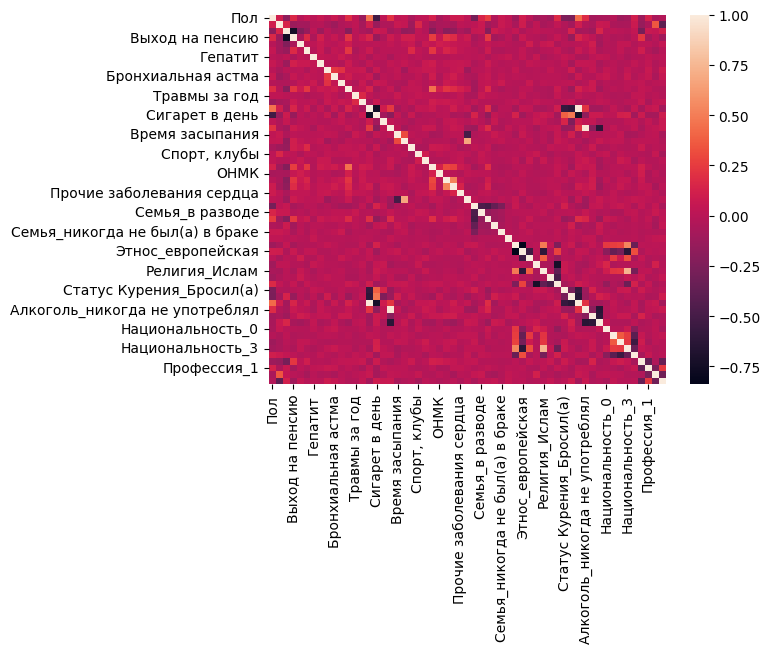

In [263]:
sns.heatmap(heart.corr(numeric_only=True))

In [264]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Возраст курения,Возраст алког,"Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)",Этнос_европейская,Статус Курения_Никогда не курил(а),Алкоголь_никогда не употреблял
Возраст курения,1.000000,0.231633,-0.082738,0.052033,0.988513,0.210620
Возраст алког,0.231633,1.000000,-0.019617,0.030951,0.222443,0.977559
"Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)",-0.082738,-0.019617,1.000000,-0.838476,-0.074820,-0.019698
Этнос_европейская,0.052033,0.030951,-0.838476,1.000000,0.049477,0.038067
Статус Курения_Никогда не курил(а),0.988513,0.222443,-0.074820,0.049477,1.000000,0.207560
Алкоголь_никогда не употреблял,0.210620,0.977559,-0.019698,0.038067,0.207560,1.000000


In [265]:
heart.drop(columns=['Статус Курения_Никогда не курил(а)','Алкоголь_никогда не употреблял', 'Этнос_другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)'], axis=1, inplace=True)

In [266]:
heart.to_csv('/content/drive/MyDrive/ML_MED/heart_4.csv', index=False)

Другие способы кодирования категориальных признаков: [ссылка](https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/)